<a href="https://colab.research.google.com/github/Srivatsav515/NLP_3/blob/main/Assignment_4_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Load data fromkeras.datasets and perform following computational analysis
###(a) Preprocessing of the Data
###(b) Divide data into training and testing data set
###(c) Build the Recurrent Neural network (RNN) Model

###(d) Training the RNN Model

###(e) Evaluate the model on the test dataset to see how well it generalizes.

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.6271 - loss: 0.6156 - val_accuracy: 0.8188 - val_loss: 0.4101
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.8586 - loss: 0.3379 - val_accuracy: 0.8297 - val_loss: 0.4118
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 38ms/step - accuracy: 0.9237 - loss: 0.2064 - val_accuracy: 0.7212 - val_loss: 0.5821
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 33ms/step - accuracy: 0.9638 - loss: 0.1110 - val_accuracy: 0.8158 - val_loss: 0.5632
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9854 - loss: 0.0481 - val_accuracy: 0.8071 - val_loss: 0.7384


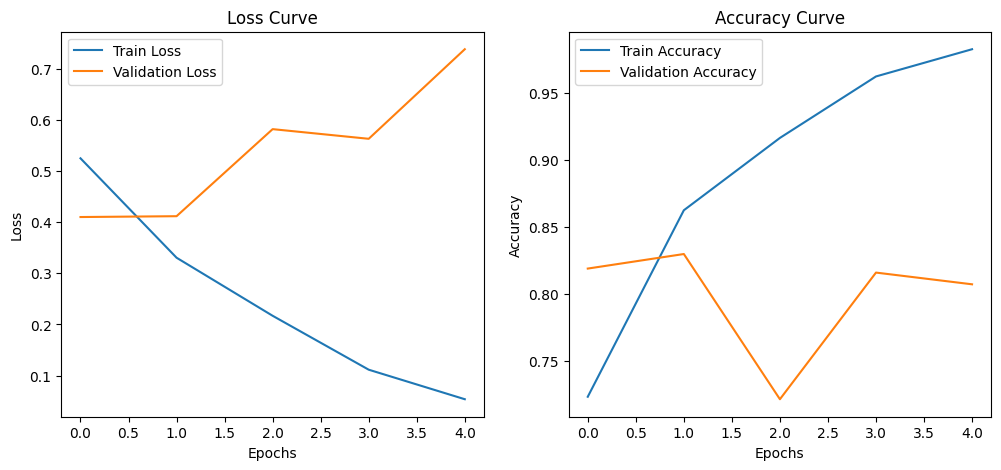

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8059 - loss: 0.7460
Test accuracy: 0.8070799708366394


In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=100)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=100)

model = keras.Sequential([
    keras.layers.Embedding(input_dim=10000, output_dim=32),
    keras.layers.SimpleRNN(32),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

## 2. Develop LSTM (Long Short-Term Memory) by utilizing data set from https://www.kaggle.com/code/amirrezaeian/time-series-data-analysis-using-lstm-tutorial Links to an external site. or take any time series data.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split



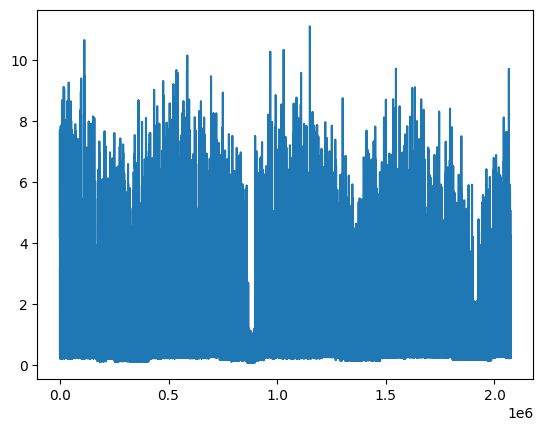

In [12]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/My Drive/household_power_consumption.txt'

df = pd.read_csv(file_path, sep=';', parse_dates={'dt': ['Date', 'Time']},
                 dayfirst=True, low_memory=False, na_values=['nan','?'], index_col='dt')

df.fillna(df.mean(), inplace=True)

data = df['Global_active_power'].values.astype(float)

plt.plot(data)
plt.show()


In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.reshape(-1, 1))

def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [14]:

from tensorflow.keras.layers import Input # Import the Input layer class

model = Sequential()

model.add(Input(shape=(X_train.shape[1], 1))) # Use Input to define the input layer

model.add(LSTM(50, return_sequences=False))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

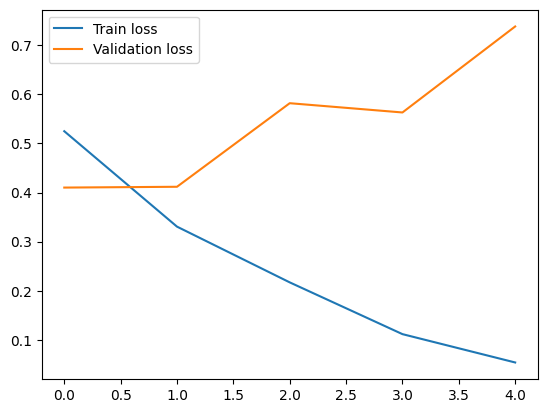

12970/12970 ━━━━━━━━━━━━━━━━━━━━ 124s 10ms/step


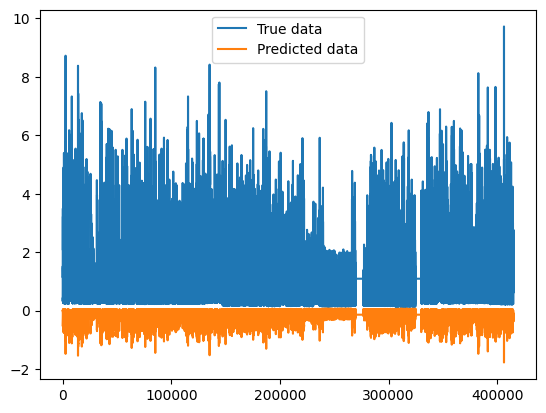

In [15]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)

plt.plot(data[-len(predicted):], label='True data')
plt.plot(predicted, label='Predicted data')
plt.legend()
plt.show()

###3. Demonstrate Vanishing and Exploding Gradients on deep neural network.

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def generate_data(n_samples=1000, n_features=20):
    X = np.random.rand(n_samples, n_features)
    y = np.random.randint(0, 2, size=(n_samples, 1))
    return X, y

def create_deep_network(activation='sigmoid'):
    model = Sequential()
    model.add(Dense(64, activation=activation))
    for _ in range(10):
        model.add(Dense(64, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    return model

class GradientMonitorCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        grads = []
        for layer in self.model.layers:
            if hasattr(layer, 'kernel'):
                grads.append(tf.reduce_mean(tf.abs(layer.kernel)))
        if grads:
            grad_mean = np.mean([g.numpy() for g in grads])
            print(f"Epoch {epoch+1}: Gradient Mean: {grad_mean:.4f}")

X, y = generate_data()

model = create_deep_network()

optimizer = SGD(learning_rate=0.0079)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

print("Training the model...")
model.fit(X, y, epochs=5, batch_size=32, callbacks=[GradientMonitorCallback()])

loss, accuracy = model.evaluate(X, y)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Training the model...
Epoch 1/5
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4865 - loss: 0.7840Epoch 1: Gradient Mean: 0.1150
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4903 - loss: 0.7730
Epoch 2/5
18/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5053 - loss: 0.7020 Epoch 2: Gradient Mean: 0.1150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5039 - loss: 0.7006
Epoch 3/5
22/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5098 - loss: 0.6934 Epoch 3: Gradient Mean: 0.1150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5098 - loss: 0.6935
Epoch 4/5
19/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4646 - loss: 0.6935 Epoch 4: Gradient Mean: 0.1150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4721 - loss: 0.6936
Epoch 5/5
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4907 - loss: 0.6936 Epoch 5: Gradient Mean: 0.1150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4861 - loss: 0.6937
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc